In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# London’s underground resilience

## Topological network

### Centrality measures

In [42]:
london_flows = pd.read_csv("london_flows.csv")
london_flows = london_flows.drop(london_flows[london_flows['station_origin'] == 'Battersea Park'].index)
london_flows = london_flows.drop(london_flows[london_flows['station_destination'] == 'Battersea Park'].index)
london_flows.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [3]:
london_network = nx.from_pandas_edgelist(london_flows, 'station_origin', 'station_destination')
list(london_network.edges(data = True))[0:10]

[('Abbey Road', 'Bank and Monument', {}),
 ('Abbey Road', 'Beckton', {}),
 ('Abbey Road', 'Blackwall', {}),
 ('Abbey Road', 'Canary Wharf', {}),
 ('Abbey Road', 'Canning Town', {}),
 ('Abbey Road', 'Crossharbour', {}),
 ('Abbey Road', 'Custom House', {}),
 ('Abbey Road', 'Cutty Sark', {}),
 ('Abbey Road', 'Cyprus', {}),
 ('Abbey Road', 'Devons Road', {})]

In [4]:
list(london_network.nodes(data = True))[0:10]

[('Abbey Road', {}),
 ('Bank and Monument', {}),
 ('Beckton', {}),
 ('Blackwall', {}),
 ('Canary Wharf', {}),
 ('Canning Town', {}),
 ('Crossharbour', {}),
 ('Custom House', {}),
 ('Cutty Sark', {}),
 ('Cyprus', {})]

#### （Degree centrality）

In [5]:
deg_london=nx.degree(london_network)
# Print degree as list: 
list(deg_london)[0:10]

[('Abbey Road', 34),
 ('Bank and Monument', 305),
 ('Beckton', 43),
 ('Blackwall', 40),
 ('Canary Wharf', 307),
 ('Canning Town', 304),
 ('Crossharbour', 42),
 ('Custom House', 44),
 ('Cutty Sark', 44),
 ('Cyprus', 42)]

In [6]:
# calculate the normalised version of degree centrality using networkx function
deg_london_norm =nx.degree_centrality(london_network)
nx.set_node_attributes(london_network,dict(deg_london_norm),'degree_norm')

In [7]:
deg_london_norm_df=pd.DataFrame.from_dict(deg_london_norm,columns=['degree_norm'],orient='index')

In [8]:
deg_london_norm_df_sorted = deg_london_norm_df.sort_values(by='degree_norm', ascending=False)
deg_london_norm_df_sorted[0:10]

,degree_norm
Stratford,0.924433
Highbury & Islington,0.808564
Whitechapel,0.780856
West Brompton,0.778338
Canary Wharf,0.773300
Liverpool Street,0.770781
Canada Water,0.770781
Bank and Monument,0.768262
Richmond,0.768262
Canning Town,0.765743


#### closeness centrality

In [9]:
# topological closeness
clos_top_london=nx.closeness_centrality(london_network)

# add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(london_network,clos_top_london,'closeness_top')

clos_top_london_df=pd.DataFrame.from_dict(clos_top_london,columns=['closeness_top'],orient='index')

In [10]:
clos_top_london_df_sorted = clos_top_london_df.sort_values(by='closeness_top', ascending=False)
clos_top_london_df_sorted[0:10]

,closeness_top
Stratford,0.929742
Highbury & Islington,0.837553
Whitechapel,0.820248
West Brompton,0.818557
Canada Water,0.813525
Richmond,0.811861
Canary Wharf,0.811861
Bank and Monument,0.811861
Canning Town,0.810204
Liverpool Street,0.810204


#### betweenness centrality

In [11]:
bet_london_top=nx.betweenness_centrality(london_network,normalized=False)

In [12]:
nx.set_node_attributes(london_network,bet_london_top,'betweenness_top')

In [13]:
bet_top_london_df=pd.DataFrame.from_dict(bet_london_top,columns=['betweenness_top'],orient='index')

In [14]:
bet_top_london_df_sorted = bet_top_london_df.sort_values(by='betweenness_top', ascending=False)
bet_top_london_df_sorted[0:10]

,betweenness_top
Stratford,7776.841995
Liverpool Street,2707.289818
Canary Wharf,2208.627931
Bank and Monument,2208.627931
Canning Town,2192.848026
West Ham,1939.641831
Highbury & Islington,1818.549454
Whitechapel,1426.939814
Shadwell,1304.955035
Canada Water,1285.264482


#### infornation centrality

In [16]:
inf_london_top=nx.information_centrality(london_network)

<class 'networkx.utils.decorators.argmap'> compilation 24:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [17]:
nx.set_node_attributes(london_network,inf_london_top,'information_top')

In [18]:
inf_london_top_df=pd.DataFrame.from_dict(inf_london_top,columns=['information_top'],orient='index')

In [19]:
inf_london_top_df_sorted = inf_london_top_df.sort_values(by='information_top', ascending=False)
inf_london_top_df_sorted[0:10]

,information_top
Stratford,0.138150
Highbury & Islington,0.134623
Whitechapel,0.133793
West Brompton,0.133738
Liverpool Street,0.133530
Bank and Monument,0.133518
Canary Wharf,0.133518
Canada Water,0.133466
Canning Town,0.133439
Richmond,0.133437


### Impact measures

In [20]:
print(f'Number of connected components:{nx.number_connected_components(london_network)}')
print(f'Highest degree node: {sorted(london_network.degree(), key=lambda pair: pair[1])[-1]}')

Number of connected components:1
Highest degree node: ('Stratford', 367)


#### degree distribution

/tmp/ipykernel_21005/3890569710.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  ax.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.', color='darkred', markersize=2)


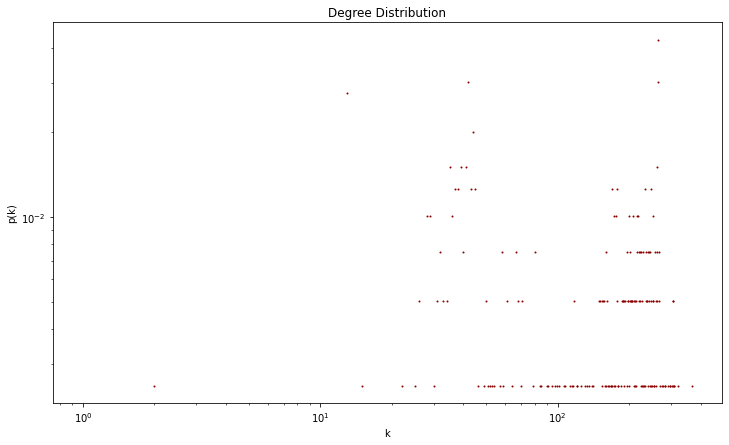

In [21]:
degree_hist = nx.degree_histogram(london_network) 
degree_hist = np.array(degree_hist, dtype=float)
degree_prob = degree_hist/london_network.number_of_nodes()

fig, ax = plt.subplots(figsize=(12,7))
ax.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.', color='darkred', markersize=2)
ax.set_xlabel('k')
ax.set_ylabel('p(k)')
ax.set_title('Degree Distribution')


plt.show()

#### （clustering coefficients）

In [22]:
# let's measure the clustering coefficient
c = nx.clustering(london_network)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8465703467039797


#### （modularity）

In [23]:
from networkx.algorithms.community import greedy_modularity_communities
import itertools

# let's start with greedy modularity
communities_fg = greedy_modularity_communities(london_network)

print(f'number of communities: {len(communities_fg)}')

number of communities: 3


In [24]:
from networkx.algorithms.community.quality import modularity
print(f'modularity of fast-greedy: {modularity(london_network, communities_fg)}')

modularity of fast-greedy: 0.1606401998500805


#### diameter

In [25]:
nx.diameter(london_network)

3

### Node removal

#### closeness centrality

In [78]:
london_network2=london_network.copy()

##### Non-sequential removal

In [79]:
clos_t_val=[(i[1]['closeness_top']) for i in london_network.nodes(data=True)]

In [80]:
maxclose=[n for n in london_network2.nodes() if london_network2.nodes[n]['closeness_top'] == max(clos_t_val)]

maxclose


['Stratford']

In [81]:
london_network2.remove_nodes_from(maxclose)
# Has the graph one component?
print(nx.is_connected(london_network2))

True


##### Sequential removal

#### betweenness centrality

In [67]:
london_network3=london_network.copy()

##### Non-sequential removal

In [68]:
betweenness_t_values=[(i[1]['betweenness_top']) for i in london_network.nodes(data=True)]

In [69]:
# remove the node with the max value 
maxbet=[n for n in london_network2.nodes() if london_network2.nodes[n]['betweenness_top'] == max(betweenness_t_values)]
maxbet

['Stratford']

In [70]:
london_network2.remove_nodes_from(maxbet)

In [71]:
# Has the graph one component?
print(nx.is_connected(london_network2))

True


##### Sequential removal

#### information centrality

In [ ]:
london_network4=london_network.copy()

##### Non-sequential removal

##### Sequential removal

## Flows: weighted network

In [ ]:
london_network = nx.from_pandas_edgelist(london_flows, 'station_origin', 'station_destination')
list(london_network.edges(data = True))[0:10]

# If we want the diameter of the network considering the weights, we need to use a trick.
# This, beacuse nx.diameter does not include this function, so we need to do :
nlen={}

for n in g4.nodes():
    a=nx.single_source_dijkstra_path_length(g4, n)
    print(a)
    nlen[n]=a
e = nx.eccentricity(g4,sp=nlen)
d = nx.diameter(g4, e)
d